In [1]:
%cd /home/josh/PycharmProjects/Muon_magnets

/home/josh/PycharmProjects/Muon_magnets


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from modules.grid import Grid
from modules.island import Island
from modules.muon import Muon
from modules.ensemble import Ensemble
import modules.functions as func

In [9]:
# Create a small grid
isle_1 = Island(orientation=0, location=[-10e-6, 0, 0], strength=2e-8, size=[1.6e-6, 700e-9])
isle_2 = Island(orientation=180, location=[10e-6, 0, 0], strength=2e-8, size=[1.6e-6, 700e-9])
grid = Grid.__new__(Grid)
grid.islands = [isle_1, isle_2]

In [10]:
# Create a vertical stack of coordinates extending in the z-axis (Islands lie on the XY plane)
_zlocs = np.linspace(-50e-6, 50e-6, 500, endpoint=True)
_ylocs = np.zeros_like(_zlocs)
_xlocs = np.zeros_like(_zlocs)
locs = np.stack([_xlocs, _ylocs, _zlocs], axis=1)

In [11]:
# Create an Ensemble object with all muons in a vertical line along Z
particles = Ensemble.__new__(Ensemble)
particles.loc = locs
particles.run_name = "test"
particles.muons = np.array([Muon(loc=xyz) for xyz in locs])
particles.calculate_fields(grid, silent=True)
particles.load_fields()
particles.set_relaxations()

Booting up...
Starting pool...
Dispatching tasks...
Started task 1/16
Started task 2/16
Started task 3/16
Started task 4/16
Started task 5/16
Started task 6/16
Started task 7/16
Started task 8/16
Started task 9/16
Started task 10/16
Started task 11/16
Started task 12/16
Started task 13/16
Started task 14/16
Started task 15/16
Started task 16/16
-------------------
0.0 % Complete
Finished calculations
Saving data to file...
Inside delete block
Saved to data/test/muon_fields.npz
Finished multiprocessing
Loaded muon_fields...


(<Figure size 425.197x262.786 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc65c331890>)

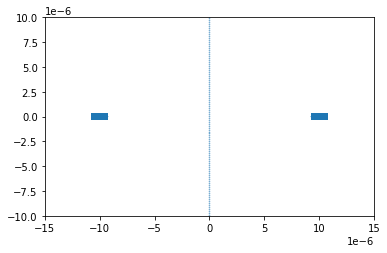

In [12]:
fig, ax = plt.subplots(figsize=func.set_fig_size(width="muon_paper"))
ax.scatter(particles.xloc, particles.zloc, s=0.5, alpha=0.5)
ax.set_xlim(-15e-6, 15e-6)
ax.set_ylim(-10e-6, 10e-6)
ax.ticklabel_format(axis="both", style="sci", scilimits=(-6, -6))
grid.show_on_plot(fig, ax, set_lims=False)

### Check if class.update_dict() overwrites or appends

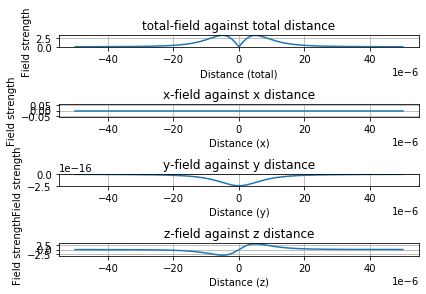

In [13]:
fig, axs = plt.subplots(4, 1)
for ax, (key, item) in zip(axs, particles.field_dict.items()):
    ax.plot(particles.zloc, item)
    ax.set_ylabel("Field strength")
    ax.set_xlabel(f"Distance ({key})")
    ax.set_title(f"{key}-field against {key} distance")
    ax.ticklabel_format(axis="x", style="sci", scilimits=(-6, -6))
    ax.grid()
plt.tight_layout(pad=1)
plt.show()